In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('house_data')

In [3]:
df.head()

,Unnamed: 0,index,price,type,address,postcode,number_bedrooms
0,0,0,320000.0,2 bedroom detached bungalow for sale,"Harmers Hay Road, Hailsham",BN27,2.0
1,1,3,7500000.0,9 bedroom detached house for sale,"Marley Common, Haslemere, Surrey, GU27",GU27,9.0
2,2,4,6500000.0,10 bedroom detached house for sale,"Selham, Petworth, West Sussex, GU28",GU28,10.0
3,3,5,5950000.0,9 bedroom detached house for sale,"Pickwell Lane, Bolney, Haywards Heath, West Su...",RH17,9.0
4,4,7,5950000.0,9 bedroom detached house for sale,"Pickwell Lane, Bolney, Haywards Heath, West Su...",RH17,9.0


In [4]:
df = df.drop(['Unnamed: 0', 'index'] ,axis = 1)

In [5]:
df = df.drop('address', axis=1)

In [6]:
df.head()

,price,type,postcode,number_bedrooms
0,320000.0,2 bedroom detached bungalow for sale,BN27,2.0
1,7500000.0,9 bedroom detached house for sale,GU27,9.0
2,6500000.0,10 bedroom detached house for sale,GU28,10.0
3,5950000.0,9 bedroom detached house for sale,RH17,9.0
4,5950000.0,9 bedroom detached house for sale,RH17,9.0


Now to deal with type. 

In [7]:
for i in range(len(df)):
        df.type[i] = df.type[i].split()

df

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,type,postcode,number_bedrooms
0,320000.0,"[2, bedroom, detached, bungalow, for, sale]",BN27,2.0
1,7500000.0,"[9, bedroom, detached, house, for, sale]",GU27,9.0
2,6500000.0,"[10, bedroom, detached, house, for, sale]",GU28,10.0
3,5950000.0,"[9, bedroom, detached, house, for, sale]",RH17,9.0
4,5950000.0,"[9, bedroom, detached, house, for, sale]",RH17,9.0
...,...,...,...,...
1014,850000.0,"[5, bedroom, barn, conversion, for, sale]",PO20,5.0
1015,850000.0,"[3, bedroom, character, property, for, sale]",BN43,3.0
1016,850000.0,"[5, bedroom, detached, bungalow, for, sale]",BN24,5.0
1017,850000.0,"[4, bedroom, house, for, sale]",RH14,4.0


In [8]:
maxlen = 6
for i in range(len(df)):
    if len(df.type[i]) > maxlen:
        print(df.type[i])

['4', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['5', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['9', 'bedroom', 'block', 'of', 'apartments', 'for', 'sale']
['5', 'bedroom', 'link', 'detached', 'house', 'for', 'sale']
['6', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['6', 'bedroom', 'block', 'of', 'apartments', 'for', 'sale']
['4', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['2', 'bedroom', 'ground', 'floor', 'flat', 'for', 'sale']
['4', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['2', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['4', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['4', 'bedroom', 'link', 'detached', 'house', 'for', 'sale']
['3', 'bedroom', 'end', 'of', 'terrace', 'house', 'for', 'sale']
['5', 'bedroom', 'block', 'of', 'apartments', 'for', 'sale']
['6', 'bedroom', 'link', 'detached', 'house', 'for', 'sale']


In [9]:
num = 0
for i in range(len(df)):
    if df.type[i][1] != 'bedroom':
        num += 1
if num != 0:
    print('oh no')
else:
    print('looks like all types start with the number of bedrooms')

looks like all types start with the number of bedrooms


In [10]:
num = 0
for i in range(len(df)):
    if df.type[i][-2] != 'for' or df.type[i][-1] != 'sale':
        num += 1
if num != 0:
    print('oh no')
else:
    print('looks like all types end with "for sale"')

looks like all types end with "for sale"


We can get rid of the first two and last two entries of each type list

In [11]:
for i in range(len(df)):
    df.type[i] = df.type[i][2:-2]

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
maxlen = 2
for i in range(len(df)):
    if len(df.type[i]) > maxlen:
        print(i, df.type[i])

65 ['end', 'of', 'terrace', 'house']
347 ['end', 'of', 'terrace', 'house']
368 ['block', 'of', 'apartments']
381 ['link', 'detached', 'house']
600 ['end', 'of', 'terrace', 'house']
602 ['block', 'of', 'apartments']
679 ['end', 'of', 'terrace', 'house']
701 ['ground', 'floor', 'flat']
729 ['end', 'of', 'terrace', 'house']
823 ['end', 'of', 'terrace', 'house']
855 ['end', 'of', 'terrace', 'house']
866 ['link', 'detached', 'house']
964 ['end', 'of', 'terrace', 'house']
978 ['block', 'of', 'apartments']
1009 ['link', 'detached', 'house']


Let's get rid of blocks of apartments and flats, as they are anomalies.

In [13]:
for i in range(len(df)):
    if df.type[i][-1] in ['apartments', 'flat']:
        df = df.drop(i)
df.reset_index(inplace=True)

In [14]:
maxlen = 2
for i in range(len(df)):
    if len(df.type[i]) > maxlen:
        print(i, df.type[i])

65 ['end', 'of', 'terrace', 'house']
344 ['end', 'of', 'terrace', 'house']
377 ['link', 'detached', 'house']
593 ['end', 'of', 'terrace', 'house']
670 ['end', 'of', 'terrace', 'house']
719 ['end', 'of', 'terrace', 'house']
813 ['end', 'of', 'terrace', 'house']
845 ['end', 'of', 'terrace', 'house']
856 ['link', 'detached', 'house']
950 ['end', 'of', 'terrace', 'house']
994 ['link', 'detached', 'house']


In [15]:
df = df.drop('index', axis=1)

In [16]:
df

,price,type,postcode,number_bedrooms
0,320000.0,"[detached, bungalow]",BN27,2.0
1,7500000.0,"[detached, house]",GU27,9.0
2,6500000.0,"[detached, house]",GU28,10.0
3,5950000.0,"[detached, house]",RH17,9.0
4,5950000.0,"[detached, house]",RH17,9.0
...,...,...,...,...
999,850000.0,"[barn, conversion]",PO20,5.0
1000,850000.0,"[character, property]",BN43,3.0
1001,850000.0,"[detached, bungalow]",BN24,5.0
1002,850000.0,[house],RH14,4.0


In [17]:
for i in range(len(df)):
    if df.type[i][-1] not in ['house', 'bungalow', 'facility']:
        print(df.type[i])

['property']
['character', 'property']
['apartment']
['property']
['barn', 'conversion']
['apartment']
['character', 'property']
['barn', 'conversion']
['property']
['apartment']
['apartment']
['apartment']
['character', 'property']
['apartment']
['apartment']
['property']
['barn', 'conversion']
['barn', 'conversion']
['apartment']
['barn', 'conversion']
['property']
['apartment']
['apartment']
['penthouse']
['barn']
['apartment']
['penthouse']
['apartment']
['apartment']
['barn', 'conversion']
['barn', 'conversion']
['property']
['barn', 'conversion']
['penthouse']
['apartment']
['property']
['barn', 'conversion']
['penthouse']
['apartment']
['apartment']
['apartment']
['apartment']
['apartment']
['cottage']
['apartment']
['villa']
['apartment']
['cottage']
['character', 'property']
['barn', 'conversion']
['cottage']
['penthouse']
['barn', 'conversion']
['character', 'property']


In [18]:
for i in range(len(df)):
    if df.type[i][-1] == 'property':
        df.type[i][-1] = 'house'

In [19]:
for i in range(len(df)):
    if df.type[i][-1] not in ['house', 'bungalow', 'facility']:
        print(df.type[i])

['apartment']
['barn', 'conversion']
['apartment']
['barn', 'conversion']
['apartment']
['apartment']
['apartment']
['apartment']
['apartment']
['barn', 'conversion']
['barn', 'conversion']
['apartment']
['barn', 'conversion']
['apartment']
['apartment']
['penthouse']
['barn']
['apartment']
['penthouse']
['apartment']
['apartment']
['barn', 'conversion']
['barn', 'conversion']
['barn', 'conversion']
['penthouse']
['apartment']
['barn', 'conversion']
['penthouse']
['apartment']
['apartment']
['apartment']
['apartment']
['apartment']
['cottage']
['apartment']
['villa']
['apartment']
['cottage']
['barn', 'conversion']
['cottage']
['penthouse']
['barn', 'conversion']


In [20]:
for i in range(len(df)):
    if df.type[i] == ['barn', 'conversion']:
        df.type[i] = ['detached', 'barn']

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
for i in range(len(df)):
    if df.type[i][-1] not in ['house', 'bungalow', 'facility']:
        print(df.type[i])

['apartment']
['detached', 'barn']
['apartment']
['detached', 'barn']
['apartment']
['apartment']
['apartment']
['apartment']
['apartment']
['detached', 'barn']
['detached', 'barn']
['apartment']
['detached', 'barn']
['apartment']
['apartment']
['penthouse']
['barn']
['apartment']
['penthouse']
['apartment']
['apartment']
['detached', 'barn']
['detached', 'barn']
['detached', 'barn']
['penthouse']
['apartment']
['detached', 'barn']
['penthouse']
['apartment']
['apartment']
['apartment']
['apartment']
['apartment']
['cottage']
['apartment']
['villa']
['apartment']
['cottage']
['detached', 'barn']
['cottage']
['penthouse']
['detached', 'barn']


In [22]:
house_types = []
for i in range(len(df)):
    if df.type[i][-1] not in house_types:
        house_types.append(df.type[i][-1])
        house_types

In [23]:
import numpy as np

df['house_type'] = np.zeros(len(df))
for i in range(len(df)):
    df['house_type'][i] = df.type[i][-1]

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
for i in range(len(df)):
    df.type[i] = df.type[i][:-1]

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df.house_type.unique()

array(['bungalow', 'house', 'facility', 'apartment', 'barn', 'penthouse',
       'cottage', 'villa'], dtype=object)

In [26]:
for i in range(len(df)):
    if df.type[i] in [['end', 'of', 'terrace'], ['link', 'detached']]:
        df.type[i] = 'semi-detached'

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
for i in range(len(df)):
    if len(df.type[i]) == 0:
        df.type[i] = ''

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
for i in range(len(df)):
    df.type[i] = ''.join( df.type[i])

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df.type.unique()

array(['detached', '', 'equestrian', 'semi-detached', 'terraced', 'town',
       'character', 'country', 'farm', 'manor', 'mews'], dtype=object)

In [30]:
df['num'] = np.ones(len(df))
df

,price,type,postcode,number_bedrooms,house_type,num
0,320000.0,detached,BN27,2.0,bungalow,1.0
1,7500000.0,detached,GU27,9.0,house,1.0
2,6500000.0,detached,GU28,10.0,house,1.0
3,5950000.0,detached,RH17,9.0,house,1.0
4,5950000.0,detached,RH17,9.0,house,1.0
...,...,...,...,...,...,...
999,850000.0,detached,PO20,5.0,barn,1.0
1000,850000.0,character,BN43,3.0,house,1.0
1001,850000.0,detached,BN24,5.0,bungalow,1.0
1002,850000.0,,RH14,4.0,house,1.0


In [31]:
# Another outlier
for i in range(len(df)):
    if df.type[i] in ['mews', 'equestrian']:
        df = df.drop(i)
df.reset_index(inplace=True)

In [32]:
# Look for how many of each type there is
df.groupby('type')['num'].sum()

type
                 110.0
character          5.0
country            4.0
detached         745.0
farm               5.0
manor              4.0
semi-detached     54.0
terraced          49.0
town               9.0
Name: num, dtype: float64

In [33]:
#df = df[df.type != 'farm']

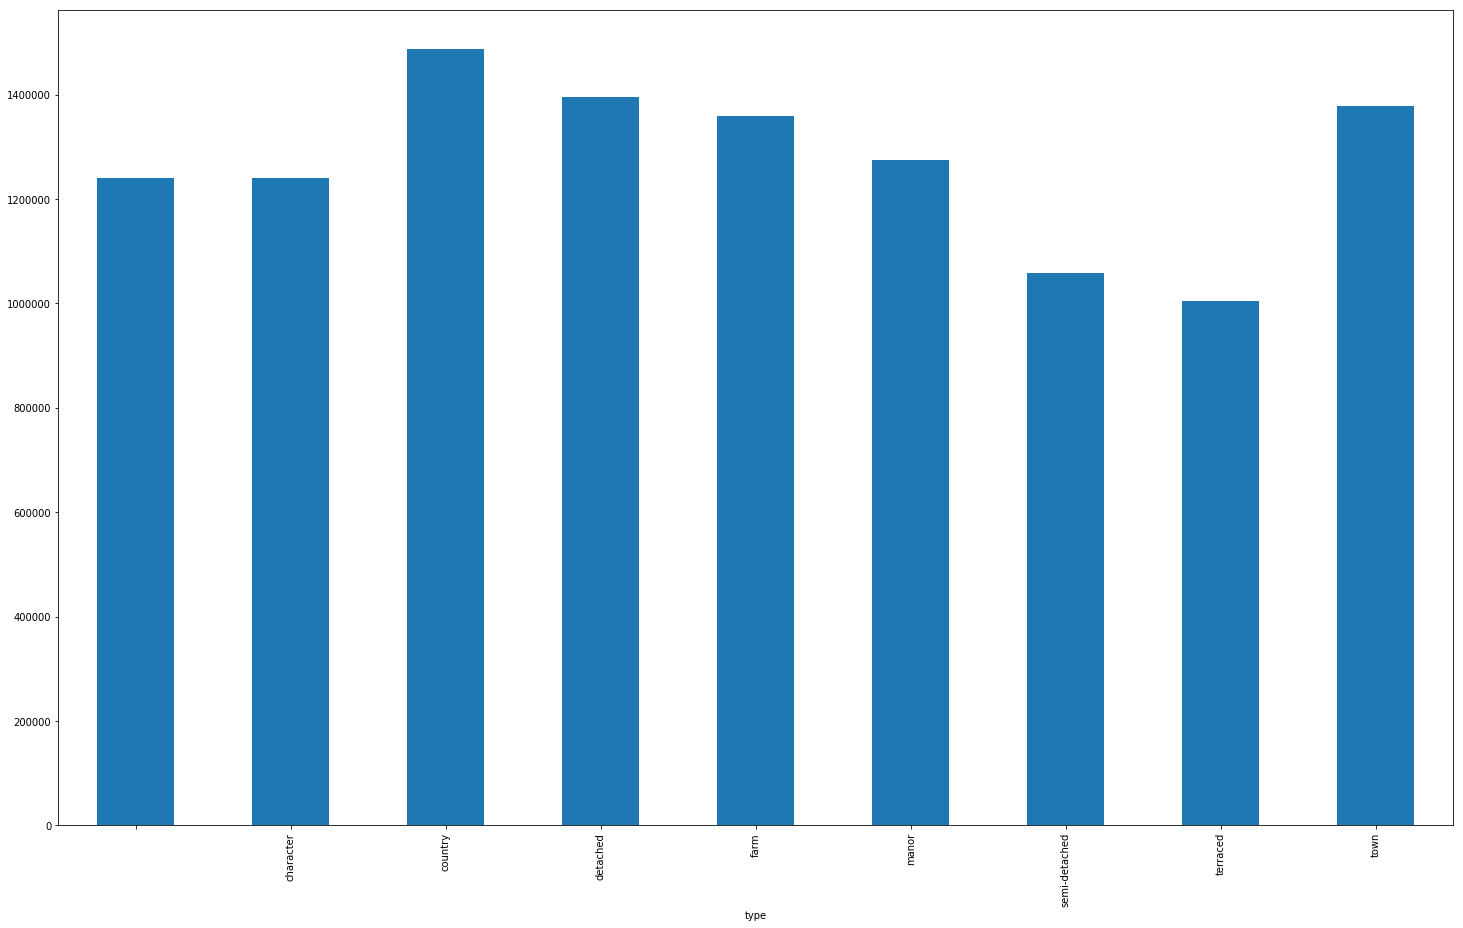

In [34]:
df.groupby('type')['price'].mean().plot(figsize = (25,15), kind='bar')

In [35]:
for i in range(len(df)):
    if df.type[i] in ['character','country', '', 'farm', 'manor', 'town']:
        df.type[i] = 'other'

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


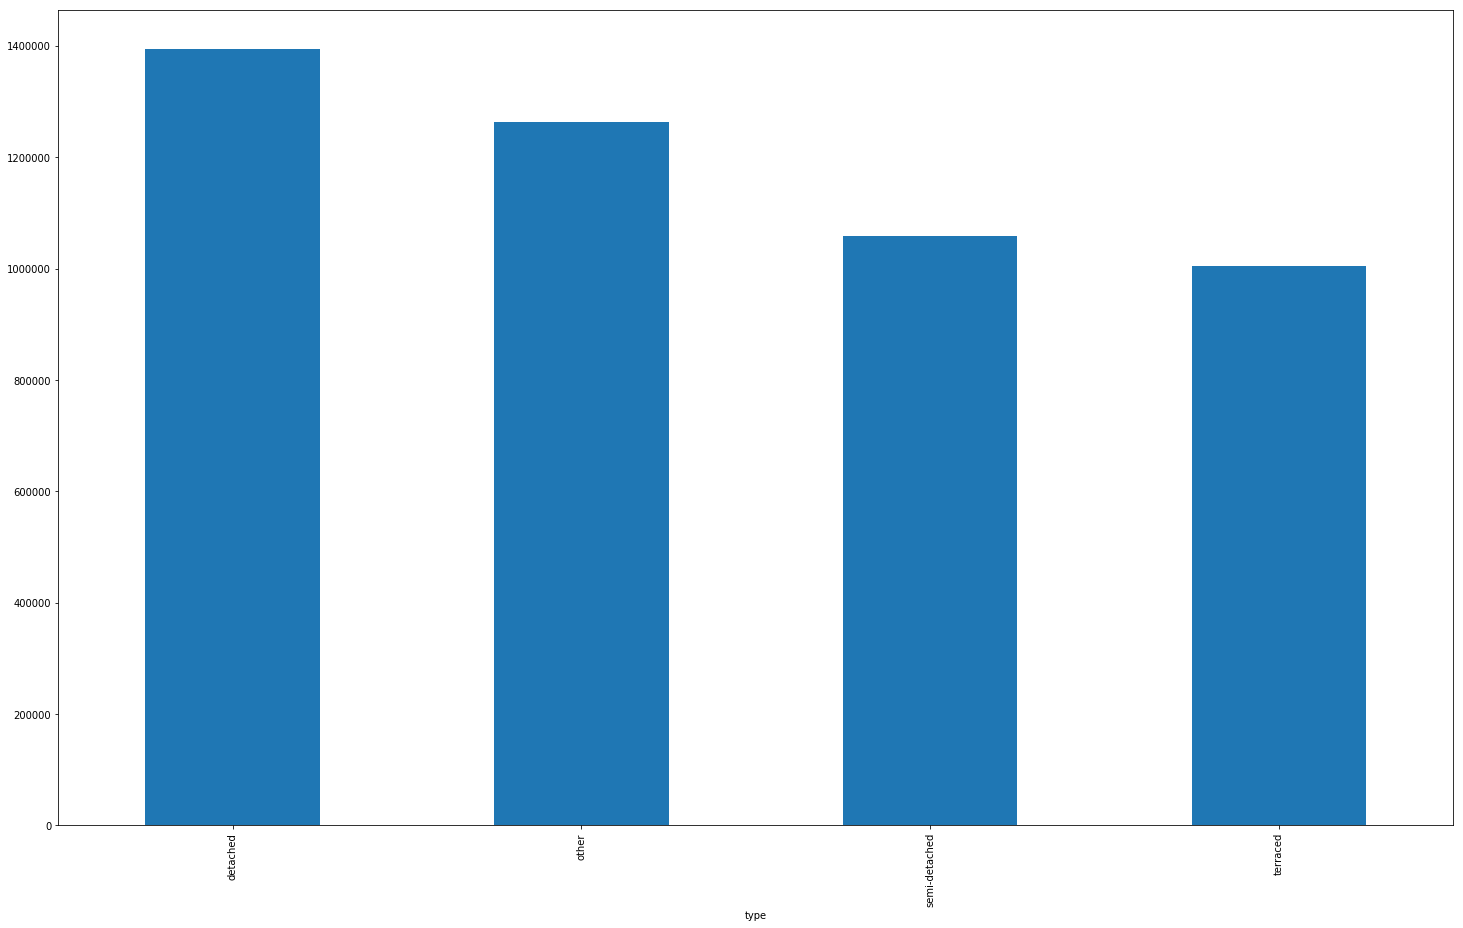

In [36]:
df.groupby('type')['price'].mean().plot(figsize = (25,15), kind='bar')

In [37]:
df.groupby('type')['num'].sum()

type
detached         745.0
other            137.0
semi-detached     54.0
terraced          49.0
Name: num, dtype: float64

In [38]:
for i in range(len(df)):
    if df.type[i] in ['semi-detached', 'terraced']:
        df.type[i] = 'attached'

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


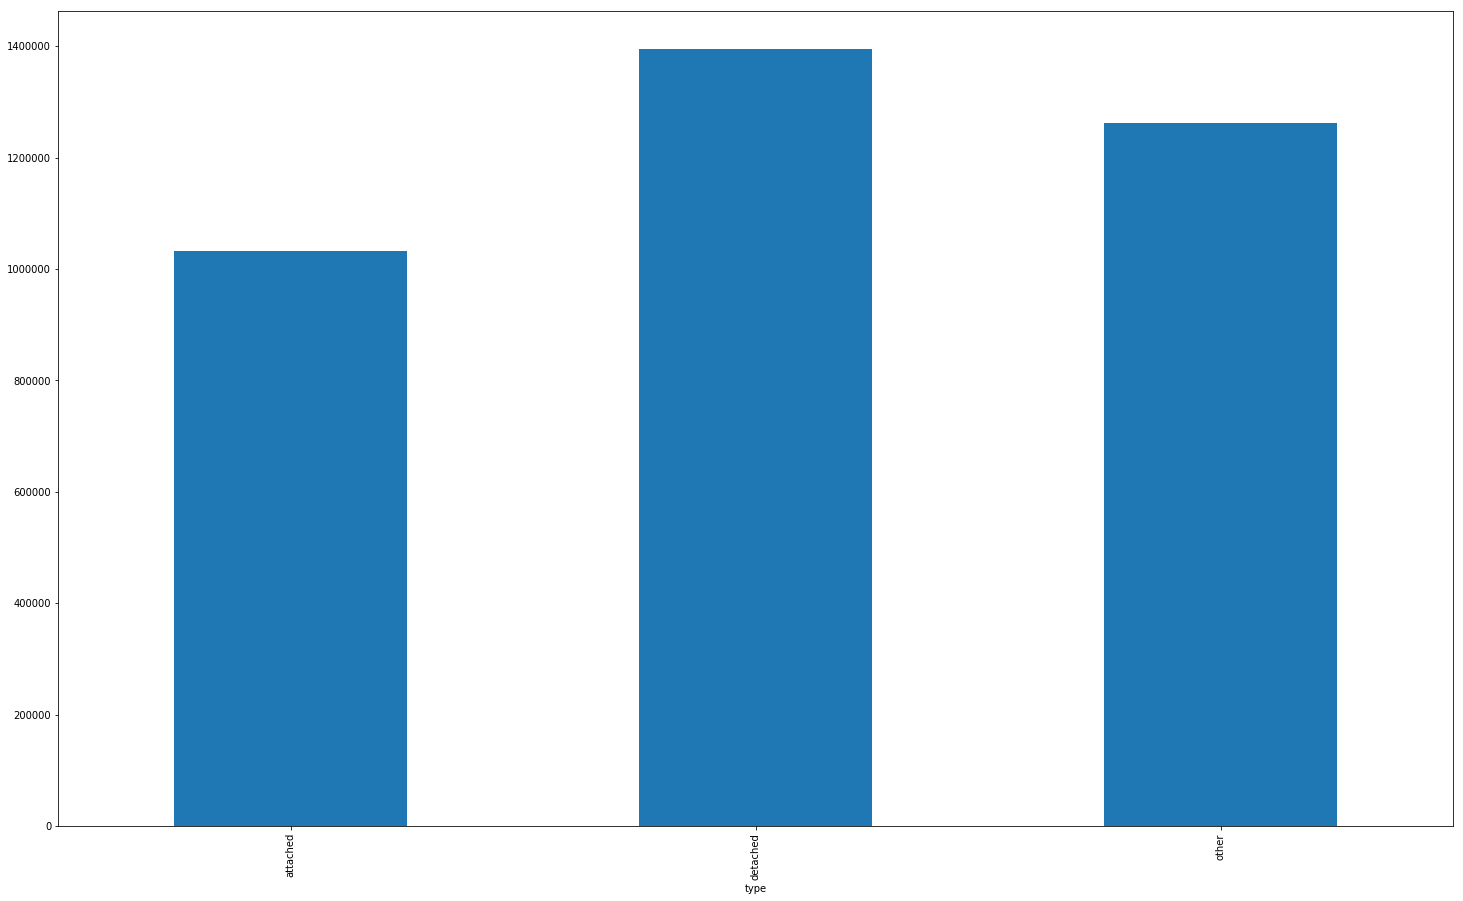

In [39]:
df.groupby('type')['price'].mean().plot(figsize = (25,15), kind='bar')

In [40]:
df = df.drop('index', axis=1)

In [41]:
df

,price,type,postcode,number_bedrooms,house_type,num
0,320000.0,detached,BN27,2.0,bungalow,1.0
1,7500000.0,detached,GU27,9.0,house,1.0
2,6500000.0,detached,GU28,10.0,house,1.0
3,5950000.0,detached,RH17,9.0,house,1.0
4,5950000.0,detached,RH17,9.0,house,1.0
...,...,...,...,...,...,...
980,850000.0,detached,PO20,5.0,barn,1.0
981,850000.0,other,BN43,3.0,house,1.0
982,850000.0,detached,BN24,5.0,bungalow,1.0
983,850000.0,other,RH14,4.0,house,1.0


In [42]:
# Look at the distance from gatwick
import pgeocode

df['dist_gat'] = np.zeros(len(df))
for i in range(len(df)):
    df['dist_gat'][i] = pgeocode.GeoDistance('GB').query_postal_code(df.postcode[i], 'RH6 0NP')

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df.groupby('house_type')['num'].sum()

house_type
apartment     21.0
barn          12.0
bungalow      23.0
cottage        3.0
house        920.0
penthouse      5.0
villa          1.0
Name: num, dtype: float64

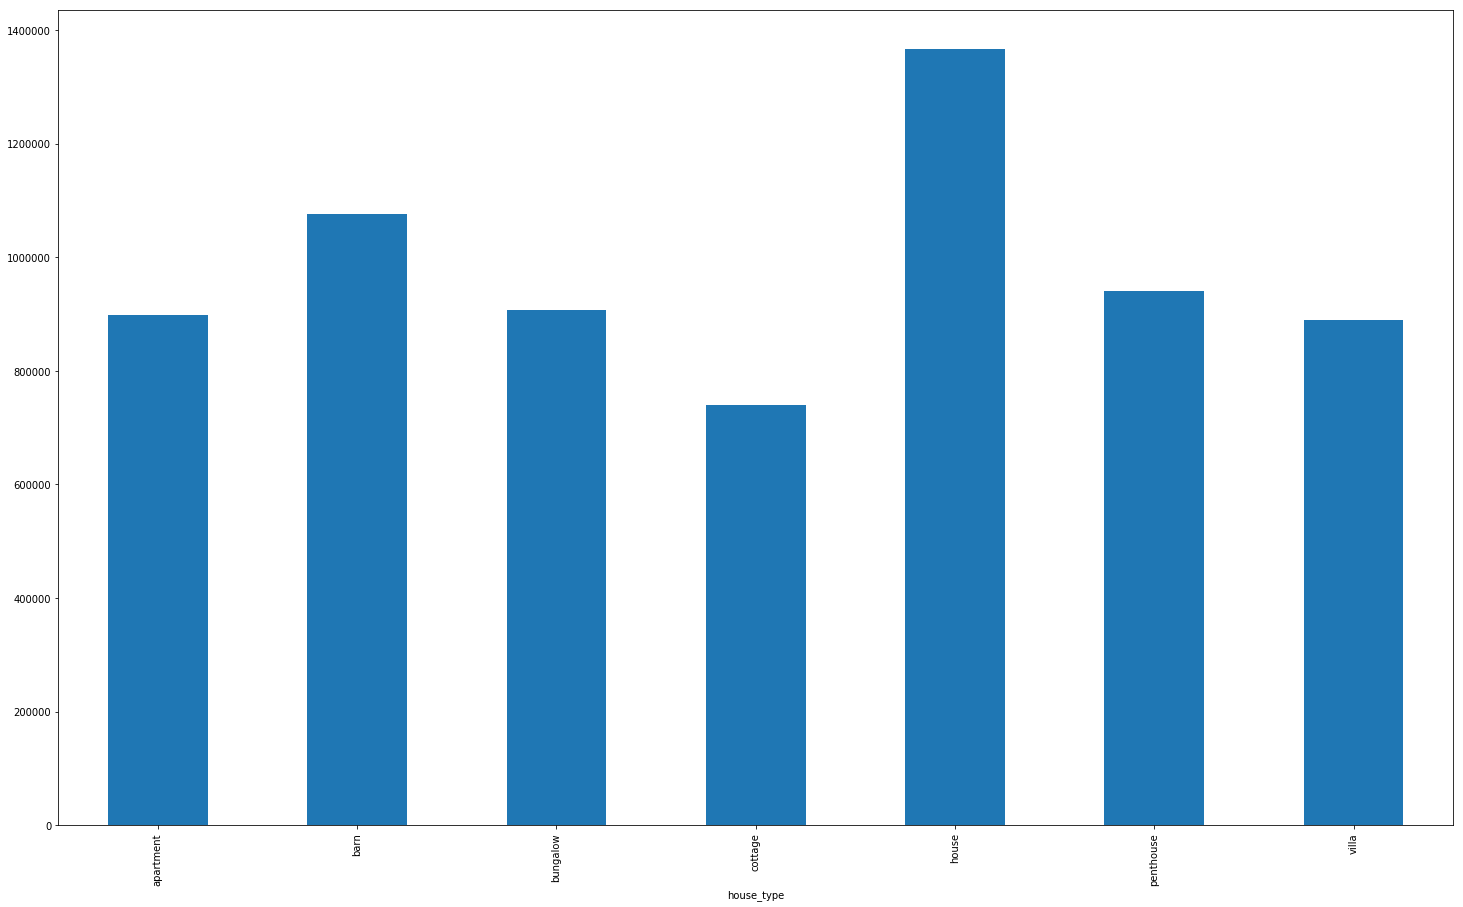

In [44]:
df.groupby('house_type')['price'].mean().plot(figsize = (25,15), kind='bar')

In [45]:
df.corr()

,price,number_bedrooms,num,dist_gat
price,1.000000,0.499373,NaN,-0.044368
number_bedrooms,0.499373,1.000000,NaN,-0.025034
num,NaN,NaN,NaN,NaN
dist_gat,-0.044368,-0.025034,NaN,1.000000


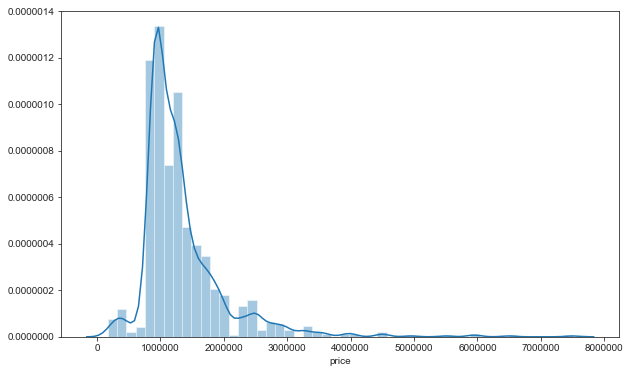

In [46]:
import matplotlib.pyplot as plt

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(df['price'])

In [47]:
print("mean:", df['price'].mean(), "  median", df['price'].median(),"  standard deviation:", df['price'].std())

mean: 1338337.6030456852   median 1150000.0   standard deviation: 697777.8158570311


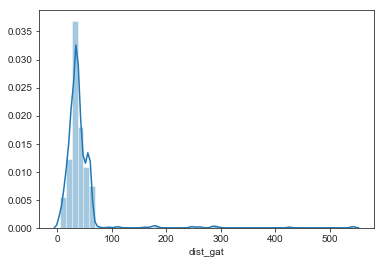

In [48]:
sns.distplot(df['dist_gat'])

In [49]:
df = df[df.dist_gat <= 100]

In [50]:
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

In [51]:
df['area'] = np.zeros(len(df))
for i in range(len(df)):
    df['area'][i] = df['postcode'][i][:2]

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


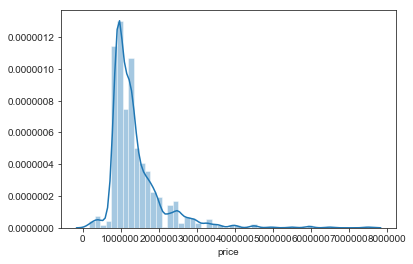

In [52]:
sns.distplot(df[df['house_type'] == 'house']['price'])

In [53]:
for i in range(len(df)):
    if df['house_type'][i] == 'house':
        if df['price'][i] > 3000000:
            df = df.drop(i)
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

In [54]:
# Getting dummies
df = pd.concat([df.drop('type', axis=1), pd.get_dummies(df['type'])], axis=1)
df = pd.concat([df.drop('house_type', axis=1), pd.get_dummies(df['house_type'])], axis=1)
df = pd.concat([df.drop(['postcode', 'area'], axis=1), pd.get_dummies(df['area'])], axis=1)

In [55]:
df = df.drop('num', axis=1)

In [56]:
from scipy.special import boxcox, inv_boxcox

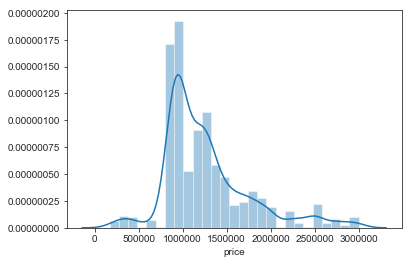

In [57]:
sns.distplot(df['price'])

In [58]:
df['price'] = boxcox(df.price,0.225)

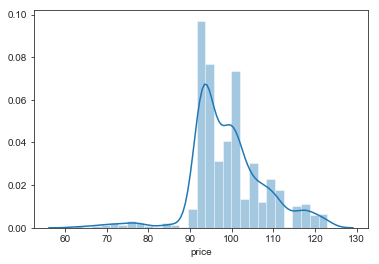

In [59]:
sns.distplot(df['price'])

In [60]:
import scipy
scipy.stats.skewtest(df.price)

SkewtestResult(statistic=0.026137479456820094, pvalue=0.9791476829821663)

In [61]:
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
X_train

,number_bedrooms,dist_gat,attached,detached,other,apartment,barn,bungalow,cottage,house,...,villa,BN,CM,GU,IG,KT,PO,RH,SS,TN
296,5.0,48.493446,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
825,4.0,31.862594,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
250,4.0,22.733091,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
204,4.0,27.973600,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
211,5.0,27.435338,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,5.0,35.686766,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
270,6.0,51.694575,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
860,3.0,36.216265,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
435,4.0,38.705931,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [63]:
from sklearn.model_selection import KFold

kfolds = KFold(n_splits=4, shuffle=True, random_state=42)

def rmsle(y_train, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [64]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(cv=kfolds))                                
svr = make_pipeline(RobustScaler(), SVR())

In [65]:
gbr = GradientBoostingRegressor(loss='huber', random_state =42)

In [66]:
lightgbm = LGBMRegressor(objective='regression', 
                                       verbose=-1,
                                       )

In [67]:
xgboost = XGBRegressor(objective='reg:linear')

In [68]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [69]:
score = cv_rmse(ridge)
score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 7.5794 (0.3108)
 2020-09-05 16:18:50.726274
elastic net: 7.5476 (0.3099)
 2020-09-05 16:18:50.945981
SVR: 7.9874 (0.5525)
 2020-09-05 16:18:51.053147
lightgbm: 7.6381 (0.5555)
 2020-09-05 16:18:51.221582
gbr: 7.4623 (0.2749)
 2020-09-05 16:18:51.965432
[16:18:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:52] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:52] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:52] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:52] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squareder

In [70]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X_train, y_train)

print('Lasso')
lasso_model_full_data = lasso.fit(X_train, y_train)

print('Ridge')
ridge_model_full_data = ridge.fit(X_train, y_train)

print('Svr')
svr_model_full_data = svr.fit(X_train, y_train)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)

print('X_traingboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y_train)

START Fit
stack_gen
[16:18:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:55] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:55] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:1

In [71]:
model = gbr_model_full_data

In [72]:
y_pr = model.predict(X_train)

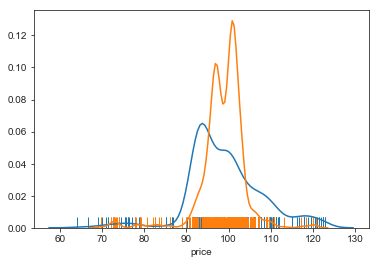

In [73]:
sns.distplot(y_train, hist=False, rug=True)
sns.distplot(y_pr, hist=False, rug=True)

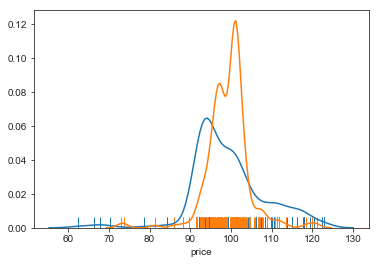

In [74]:
y_pred = model.predict(X_test)
sns.distplot(y_test, hist=False, rug=True)
sns.distplot(y_pred, hist=False, rug=True)

In [75]:
import sys
np.set_printoptions(threshold=sys.maxsize)

X_train.iloc[0]

number_bedrooms     5.000000
dist_gat           48.493446
attached            0.000000
detached            1.000000
other               0.000000
apartment           0.000000
barn                0.000000
bungalow            0.000000
cottage             0.000000
house               1.000000
penthouse           0.000000
villa               0.000000
BN                  1.000000
CM                  0.000000
GU                  0.000000
IG                  0.000000
KT                  0.000000
PO                  0.000000
RH                  0.000000
SS                  0.000000
TN                  0.000000
Name: 296, dtype: float64

In [76]:
new = [4,pgeocode.GeoDistance('GB').query_postal_code('RH10 4JJ', 'RH6 0NP'), 0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0]
#model.predict(new)
len(new)

21

In [77]:
X_test

,number_bedrooms,dist_gat,attached,detached,other,apartment,barn,bungalow,cottage,house,...,villa,BN,CM,GU,IG,KT,PO,RH,SS,TN
334,5.0,19.724686,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
583,4.0,60.044032,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
408,9.0,31.862594,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
370,4.0,36.216265,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
30,5.0,27.588387,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,5.0,17.950947,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
81,10.0,52.451940,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
286,4.0,33.900591,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
728,4.0,12.489328,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [78]:
X_test.loc[240] = new

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [79]:
X_test

,number_bedrooms,dist_gat,attached,detached,other,apartment,barn,bungalow,cottage,house,...,villa,BN,CM,GU,IG,KT,PO,RH,SS,TN
334,5.0,19.724686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
583,4.0,60.044032,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
408,9.0,31.862594,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,4.0,36.216265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,5.0,27.588387,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,10.0,52.451940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
286,4.0,33.900591,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
728,4.0,12.489328,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
581,5.0,27.355727,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
pred = model.predict(np.array(X_test.iloc[-1]).reshape(1, -1))

In [81]:
inv_boxcox(pred,0.225)

array([994013.97182898])